In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import scienceplots
plt.style.use(['science', 'no-latex'])

In [12]:
houses = np.loadtxt('../Data/houses.txt', delimiter = ',')
Xh = houses[:,:4]
th = houses[:, 4]

labels = ['Size', 'Rooms', 'Floors', 'Years']

In [6]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh) #Normalizamos los datos

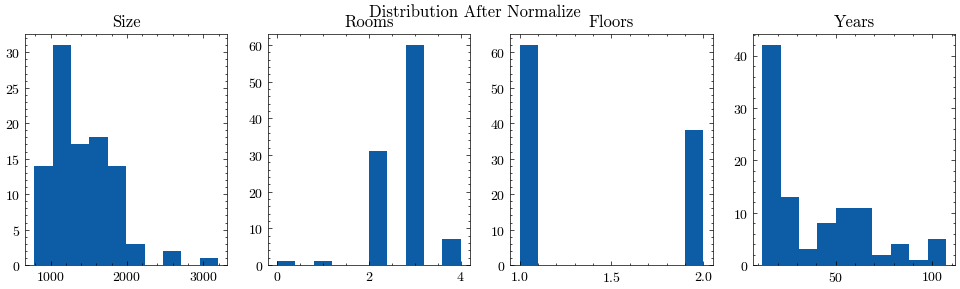

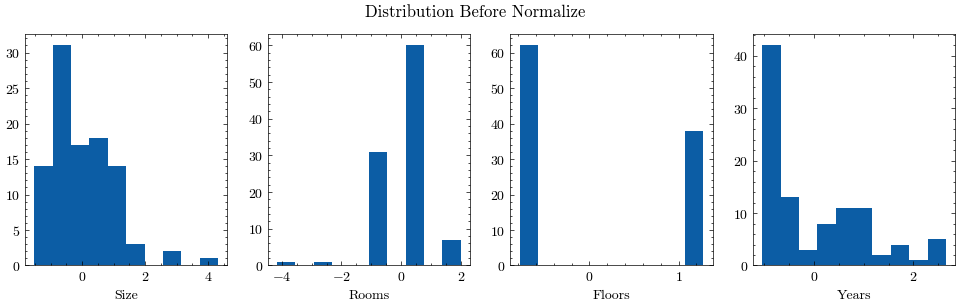

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
    ax[i].hist(Xh[:, i]);
    ax[i].set_title(labels[i]);
fig.suptitle('Distribution After Normalize')
plt.show()


fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i]);
    ax[i].set_xlabel(labels[i]);
fig.suptitle('Distribution Before Normalize')
plt.show()

In [17]:
sgdr = SGDRegressor(max_iter = 1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)

print(sgdr)
print(f'Number of iterations completed:  {sgdr.n_iter_}, number of weight updates: {sgdr.t_}')

SGDRegressor(learning_rate='constant')
Number of iterations completed:  17, number of weight updates: 1701.0


In [19]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_ 
print(f"model parameters:  w: {w0_norm}, b:{w_norm}")

model parameters:  w: [361.83006708], b:[109.61114786 -21.91562506 -32.78568121 -37.80212951]


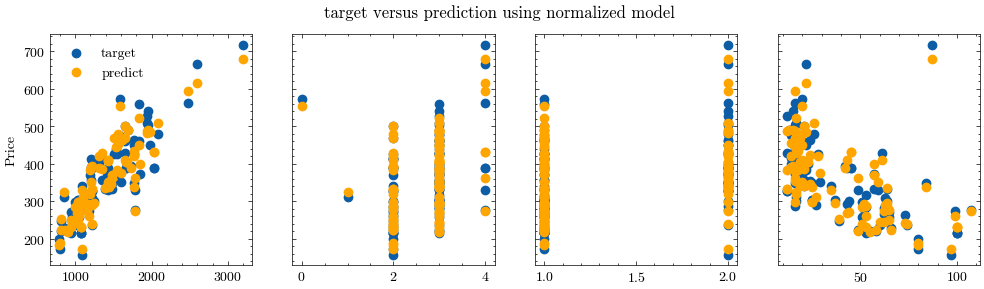

In [20]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target')
    ax[i].scatter(Xh[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [32]:
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
coeffs =sgdr.coef_
intercept = sgdr.intercept_

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 33, number of weight updates: 2311.0


In [24]:
sgdr.score(X_test, y_test)

0.9633412183431669

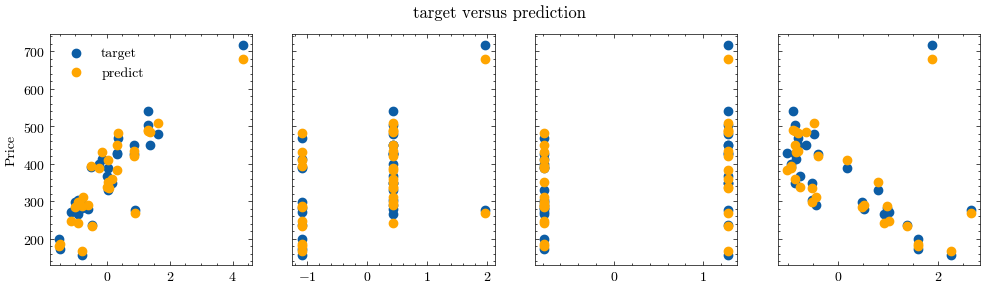

In [34]:
yp = intercept[0]
for i in range(len(w_norm)):
  yp+=coeffs[i]*X_test[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].scatter(X_test[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction")
plt.show()

## Usando Keras SGD

In [36]:
from keras.models import Sequential


2023-09-08 20:41:12.699860: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-08 20:41:12.765829: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-08 20:41:12.766681: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 20:41:14.373356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
